In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
df = pd.read_csv('weight_height_dataset.csv')

In [6]:
df.head()

,weight,height
0,45,150
1,48,152
2,50,155
3,52,157
4,55,160


Text(0, 0.5, 'height')

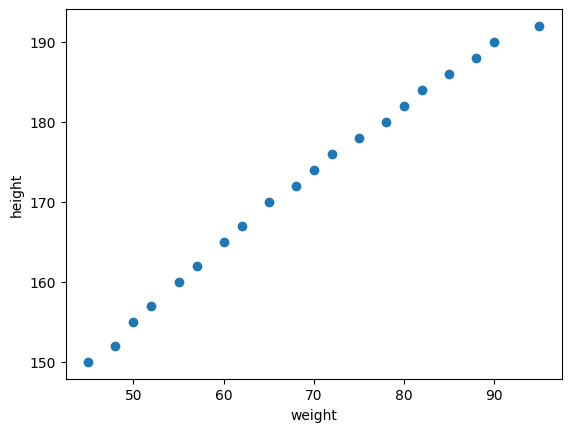

In [9]:
# scatter plot
plt.scatter(df['weight'], df['height'])
plt.xlabel("weight")
plt.ylabel("height")

In [10]:
df.corr()

,weight,height
weight,1.000000,0.996785
height,0.996785,1.000000


In [15]:
# seaborn for visualization
import seaborn as sns

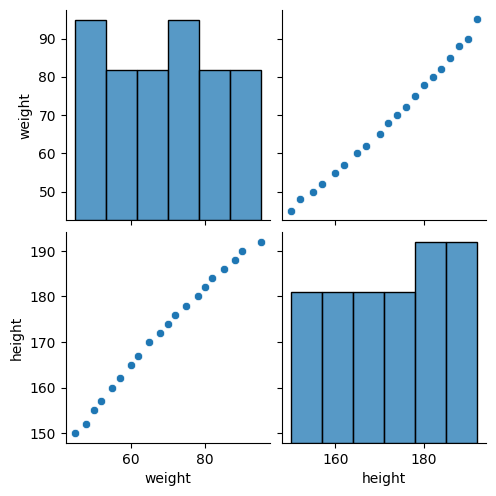

In [18]:
sns.pairplot(df)

In [19]:
# independent and dependent feature
df.head()

,weight,height
0,45,150
1,48,152
2,50,155
3,52,157
4,55,160


In [27]:
X_series = df['weight']
np.array(X_series).shape

(20,)

In [ ]:

# independent features should be dataframe or 2 dimensional array
X = df[['weight']] 
y = df['height'] # this variable can be in series form or 1d form

In [29]:
y

0     150
1     152
2     155
3     157
4     160
5     162
6     165
7     167
8     170
9     172
10    174
11    176
12    178
13    180
14    182
15    184
16    186
17    188
18    190
19    192
Name: height, dtype: int64

In [32]:
## train - test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25)

In [33]:
X_train.shape


(15, 1)

In [ ]:
# standardization
# standardization is the process of transforming data so tht is has mean =0 and std_Deviation =1
# formula = (x - mean)/std_Deviation
# why we do 
# reason 1 : features may have different scales if not scaled Large scale feature dominates gradient updates.
# Reason 2: Faster Gradient Descent Convergence When features are on same scale: Cost surface becomes more symmetric Gradient descent converges faster Without scaling: Cost function becomes elongated Very slow learning
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# now for all the above points the mean will be zero and std deviation will be 1 
# this is called transformation here  which we assign it to x_train
# always remember in test data we do not apply fit_transform
# difference between fit_transform and transform is that 
# initally whatever data that i have in train  i am going to use the mean ans std deviation of this data 
# and i will apply the same fromula in test dataset 
# so in training we do fit_transform and in test we just do transform
#  when i say transfrom i will use the training dataset mean and std deviation and use it over here 
# data leakage
X_test = scaler.transform(X_test)



d:\UDEMY\Practical\myvenv\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [38]:
X_test

array([[75.],
       [55.],
       [78.],
       [48.],
       [70.]])

In [39]:
## apply linear regression
from sklearn.linear_model import LinearRegression


In [40]:
regression = LinearRegression()

In [ ]:
regression.fit(X_train, y_train)
# isme humesha 2d array hi jayega


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [47]:
print("coefficient or slope : ", regression.coef_)
print("intercept :", regression.intercept_)

coefficient or slope :  [13.11415076]
intercept : 173.06666666666666


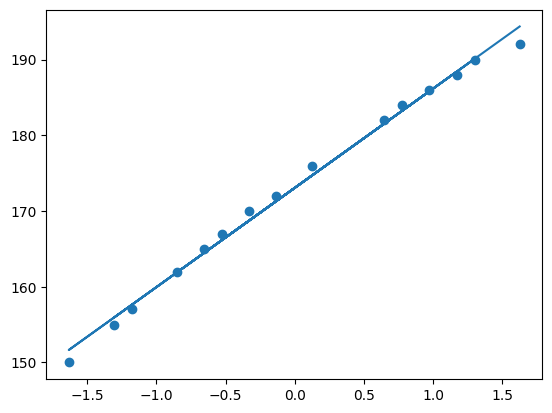

In [49]:
# plot training data  plot best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

prediction of test data 
1. predicted height output = intercept + coef_(weights)
2. y_pred_test =same as above 

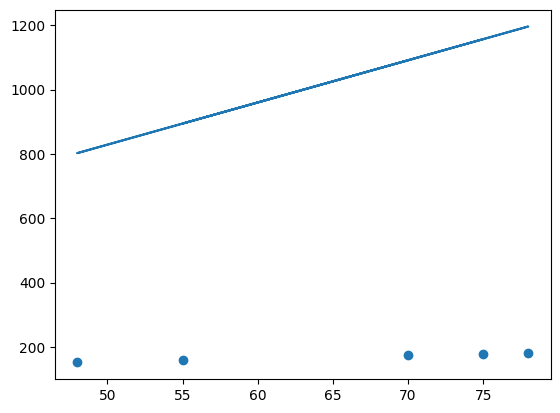

In [54]:
# prediction for test data
plt.scatter(X_test, y_test)
plt.plot(X_test, regression.predict(X_test))
y_pred = regression.predict(X_test)

In [55]:
## performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [58]:
mse = mean_squared_error(y_test, y_pred)
mae= mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

758675.0102545178
859.3092961503487
871.0195234634627


In [60]:
import statsmodels.api as sm

In [61]:
model = sm.OLS(y_train, X_train).fit()

In [63]:
prediction = model.predict(X_test)

In [64]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 height   R-squared (uncentered):                   0.006
Model:                            OLS   Adj. R-squared (uncentered):             -0.065
Method:                 Least Squares   F-statistic:                            0.08038
Date:                Thu, 12 Feb 2026   Prob (F-statistic):                       0.781
Time:                        18:18:02   Log-Likelihood:                         -98.589
No. Observations:                  15   AIC:                                      199.2
Df Residuals:                      14   BIC:                                      199.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------